In [29]:
import numpy as np
from PIL import Image
from numpy import testing
from numpy.fft.helper import ifftshift
from numpy.lib.npyio import load
from HW1_script import convolution ,cross_corr
import matplotlib.pyplot as plt 
from scipy.fft import fft2, fftshift,ifft2,ifftshift

Problem1: Write down a 3x3 filter that returns a positive value if the average value of the 4-adjacent neighbors is less than the center and a negative value otherwise.  

Since the convolution results in a dot product. we "average" the adjacent pixels by multiplying by -1/4. The middle pixel is multiplied by 1.  the  final sum will be positive if the middle is greater than the adjacents.  

In [30]:
my_filter = np.array([[0,-.25,0],[-.25,1,-.25],[0,-.25,0,]]) 
test1= np.ones((3,3)) 
test1[1,1] = 5 
out= convolution(test1,my_filter)
print("---Filter output in convolution---")
print(out)
print('---Filter ouptut in  cross_corr---')
out= cross_corr(test1,my_filter)
#notice the output is the same because the filter is symmetric
print(out)

---Filter output in convolution---
[[ 0.5  -0.75  0.5 ]
 [-0.75  4.   -0.75]
 [ 0.5  -0.75  0.5 ]]
---Filter ouptut in  cross_corr---
[[ 0.5  -0.75  0.5 ]
 [-0.75  4.   -0.75]
 [ 0.5  -0.75  0.5 ]]


Problem 2 
Write a filter that will compute the gradient in the x-direction: (point 5)
gradx(y,x) = im(y,x+1)-im(y,x) for each x,y

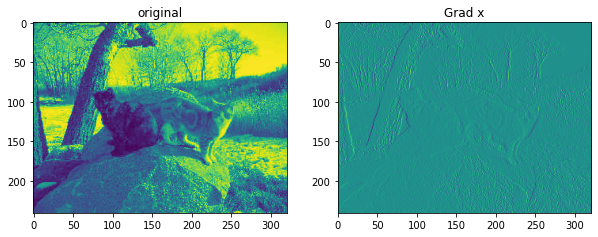

In [31]:
img =  np.array(Image.open('sample1.jpg').convert(mode='L'))
#note that due to transpose this will go from difference across y to difference across x 
grad_filt = np.array( [ [0,-1,0],[0,1,0],[0,0,0] ])
out = convolution(img,grad_filt)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img)
plt.title('original')
plt.subplot(122)
plt.imshow(out)
plt.title('Grad x')
plt.show()

Problem 3:  Helperfunctions 

In [32]:
#this is the function that will do our frequency domain filtering. 
#We are following the processing steps defined by Woods in Digital Image Processing 3rd edition page 263 
def freq_domain(img,filt):
    x,y = img.shape 
    f_x,f_y = filt.shape 
    p,q = (2*x,y*2) # every image should be padded 2x its original size 
    img =  np.pad(img,((0,p-x),(0,q-y)) ) 
    #instead of uniform padding we extend from bottom and farthest right 
    img = norm_step(img)  
    #pad the filter, center and calculate fft
    filt_p  = np.pad( filt,((0,p-f_x),(0,q-f_y)))   
    filt_p = norm_step(filt_p)
    img_f=  calc_fft(img,center=False) 
    filt_f= calc_fft(filt_p,center=False)
    #do the filtering. 
    output = freq2spatial(img_f * filt_f  )
    output  = output[0:x,0:y] 
    return  output

#woods requires this processing so wet a centered  fft. 
#usually fftshift would solve this but code wouldn't work otherwise
def norm_step(img): 
    #function essentially takes every i,j pixel and multiplies it by -1^(i+j)
    xax = np.arange(0,img.shape[0])
    yax = np.arange(0,img.shape[1]) 
    x,y = np.meshgrid(xax,yax)
    img = img * func(x,y).T 
    return img 
def func(x,y): 
    return -1**(x+y)
#wrapper function to do fft.
def calc_fft(x:np.ndarray,center=True): 
    ff = fft2(x)
    if center:
        ff =  fftshift(x)
    return ff
#do the inverse transform
def freq2spatial(img):
    img =  norm_step(np.real(ifft2(img)))
    return img

In [33]:
img =  np.array(Image.open('sample1.jpg').convert(mode='L'))
grad_filt = np.array( [ [1,0,-1],[2,0,-2],[1,0,-1] ])#these are the sobel filters 
grad_filt2 = np.array( [ [1,2,1],[0,0,0],[-1,-2,-1] ])
out1 = freq_domain(img,grad_filt)
out2 = freq_domain(img,grad_filt2)

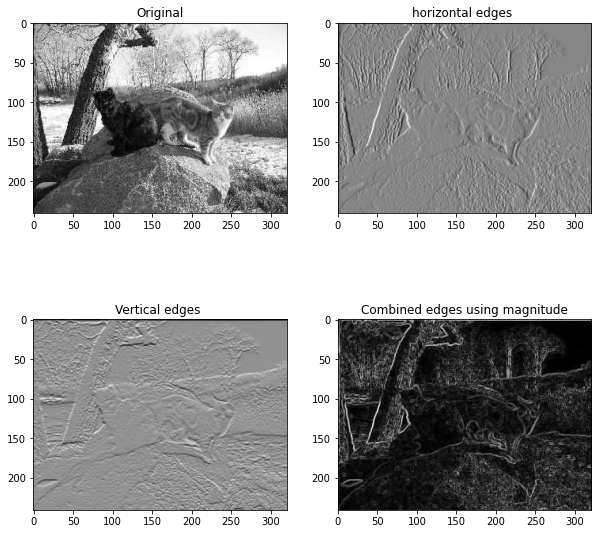

In [34]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Original')
plt.imshow(img,cmap='gray')
plt.subplot(222)
plt.imshow(out1,cmap='gray') 
plt.title('horizontal edges ')
plt.subplot(223)
plt.title('Vertical edges ')
plt.imshow(out2,cmap='gray')
plt.subplot(224) 
plt.imshow(np.sqrt(out1**2+out2**2),cmap='gray') 
plt.title("Combined edges using magnitude")
plt.show() 